In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.callbacks import TensorBoard

In [2]:
import os
from PIL import Image
from tqdm import tqdm
import numpy as np
import pandas as pd


In [3]:
data_path = "D:\\project\\dataset\\gen_land_marks_dataset\\FrameLM_1.csv"


data = pd.read_csv(data_path)
data['sign_n'] = data['sign'].astype('category').cat.codes

data

,hx0,hy0,hz0,hx1,hy1,hz1,hx2,hy2,hz2,hx3,...,pz30,px31,py31,pz31,px32,py32,pz32,frame,sign,sign_n
0,0.852227,0.983215,-9.323823e-07,0.768083,0.920275,0.010360,0.729147,0.840298,0.017422,0.718392,...,0.346088,0.528452,3.479409,-0.863327,0.332183,3.446463,-0.439571,1,YES,3
1,0.842515,0.977264,-8.335188e-07,0.764307,0.918845,0.006046,0.726692,0.835879,0.010717,0.716232,...,0.339676,0.544847,3.480860,-0.523164,0.361347,3.447683,-0.451702,2,YES,3
2,0.840599,0.978044,-8.642483e-07,0.762400,0.919040,0.005827,0.726052,0.836421,0.010546,0.715829,...,0.137392,0.551744,3.480903,-0.662228,0.374723,3.446330,-0.661206,3,YES,3
3,0.841580,0.978331,-8.496299e-07,0.762765,0.919754,0.005406,0.726046,0.837680,0.009786,0.715328,...,0.209948,0.556197,3.480865,-0.631840,0.381840,3.446407,-0.585076,4,YES,3
4,0.840934,0.975524,-8.380139e-07,0.762521,0.917461,0.004385,0.724841,0.834434,0.008511,0.714348,...,0.228242,0.557779,3.483678,-0.619469,0.386567,3.448076,-0.565797,5,YES,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.527701,1.045380,3.110638e-07,0.588384,0.962299,0.009091,0.605806,0.860496,0.017685,0.598319,...,0.285206,0.671626,3.324949,-0.219490,0.469500,3.301510,-0.477835,16,THANK YOU,2
1596,0.550885,1.033975,2.727205e-07,0.608868,0.950832,0.016230,0.623980,0.860820,0.030393,0.618871,...,0.267277,0.693834,3.287955,-0.225857,0.502225,3.273234,-0.485143,17,THANK YOU,2
1597,0.553647,1.026421,2.900935e-07,0.610681,0.949270,0.009173,0.626380,0.858791,0.019050,0.621100,...,0.175901,0.695300,3.277865,-0.275654,0.498671,3.264914,-0.559766,18,THANK YOU,2
1598,0.555163,1.014825,3.972509e-07,0.612843,0.941544,0.010686,0.628959,0.852767,0.020552,0.623340,...,0.191361,0.701207,3.279783,-0.293294,0.502111,3.265288,-0.550540,19,THANK YOU,2


In [4]:
keypints_array = data.values[:,:162].reshape(80, 20, 54,3)
lable_array = data.values[:,-1].reshape(80, 20, 1)

In [5]:
lable_array_ = np.zeros((80, 4))
for i in range(lable_array_.shape[0]):
    lable_array_[i][lable_array[i][0][0]] = 1.

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(keypints_array, lable_array_, test_size=0.1, random_state=42)

In [46]:
y_test.shape

(8, 4)

In [45]:
X_test.shape

(8, 20, 54, 3)

In [8]:
keypints_array = keypints_array.astype('float32')

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential()
model.add(Conv2D(80, (3, 3), activation='relu', input_shape=(20, 54,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(160, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

In [56]:
model.compile(optimizer = 'Adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [57]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 18, 52, 80)        2240      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 9, 26, 80)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 7, 24, 160)        115360    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 3, 12, 160)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 5760)              0         
                                                                 
 dropout_4 (Dropout)         (None, 5760)             

In [58]:
X_test

array([[[[ 7.0795834e-01,  8.0692315e-01, -5.1204637e-07],
         [ 6.3262212e-01,  7.4812031e-01,  4.1797170e-03],
         [ 5.8262008e-01,  6.5756500e-01, -1.7022963e-03],
         ...,
         [ 3.4490365e-01,  3.2325249e+00,  1.1319870e-02],
         [ 5.6350023e-01,  3.3418868e+00, -4.0389386e-01],
         [ 3.9762935e-01,  3.3205400e+00, -6.9593292e-01]],

        [[ 7.1324116e-01,  8.1538057e-01, -4.8341906e-07],
         [ 6.3427931e-01,  7.4974096e-01,  2.0269898e-03],
         [ 5.8313715e-01,  6.5509892e-01, -5.1436867e-03],
         ...,
         [ 3.4405106e-01,  3.2414858e+00,  1.1870443e-02],
         [ 5.6447673e-01,  3.3569188e+00, -4.0024996e-01],
         [ 3.9830929e-01,  3.3306520e+00, -7.1025950e-01]],

        [[ 7.1649593e-01,  8.1605399e-01, -1.6822145e-07],
         [ 6.3672376e-01,  7.5245160e-01,  4.9677258e-03],
         [ 5.8441579e-01,  6.6128337e-01, -2.7586550e-03],
         ...,
         [ 3.4235018e-01,  3.2790277e+00,  2.9440915e-02],
         [

In [59]:
history = model.fit(X_train, y_train,epochs = 50)
model.summary()

Epoch 1/50
3/3 [==============================] - 1s 39ms/step - loss: 1.4959 - categorical_accuracy: 0.1944
Epoch 2/50
3/3 [==============================] - 0s 41ms/step - loss: 1.3754 - categorical_accuracy: 0.3056
Epoch 3/50
3/3 [==============================] - 0s 44ms/step - loss: 1.2002 - categorical_accuracy: 0.5278
Epoch 4/50
3/3 [==============================] - 0s 43ms/step - loss: 1.0836 - categorical_accuracy: 0.5139
Epoch 5/50
3/3 [==============================] - 0s 45ms/step - loss: 0.9153 - categorical_accuracy: 0.5833
Epoch 6/50
3/3 [==============================] - 0s 43ms/step - loss: 0.8274 - categorical_accuracy: 0.7083
Epoch 7/50
3/3 [==============================] - 0s 42ms/step - loss: 0.7201 - categorical_accuracy: 0.7083
Epoch 8/50
3/3 [==============================] - 0s 43ms/step - loss: 0.5997 - categorical_accuracy: 0.7639
Epoch 9/50
3/3 [==============================] - 0s 44ms/step - loss: 0.6627 - categorical_accuracy: 0.7500
Epoch 10/50
3/3 [==

In [60]:
model.predict(X_test)

1/1 [==============================] - 1s 547ms/step


array([[1.4019641e-03, 9.8971528e-01, 7.6159013e-05, 8.8065797e-03],
       [1.1355870e-03, 1.5869526e-04, 2.2032030e-07, 9.9870551e-01],
       [1.2967058e-03, 7.5349969e-01, 3.8703160e-06, 2.4519975e-01],
       [2.1928216e-03, 9.9678373e-01, 4.3568935e-04, 5.8774324e-04],
       [2.7659761e-03, 1.0881429e-01, 1.1935674e-04, 8.8830042e-01],
       [2.1300535e-03, 9.8719120e-01, 1.8097287e-04, 1.0497757e-02],
       [9.1867498e-04, 2.2891378e-04, 1.8508916e-07, 9.9885225e-01],
       [1.8966497e-05, 2.4966490e-05, 9.9995577e-01, 3.4499422e-07]],
      dtype=float32)

In [61]:
y_test

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [62]:
model.save('D:\\project\\asl\\move_model.h5')

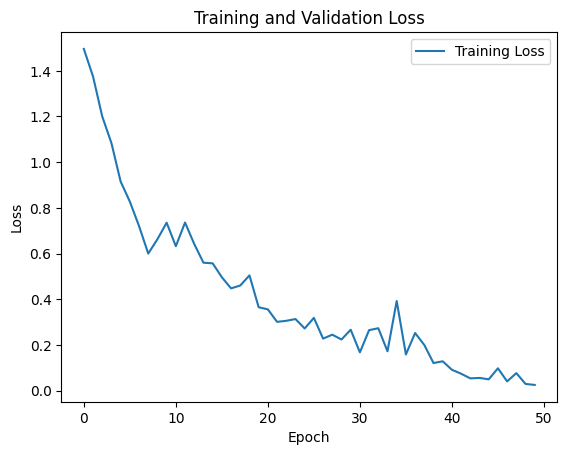

In [67]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

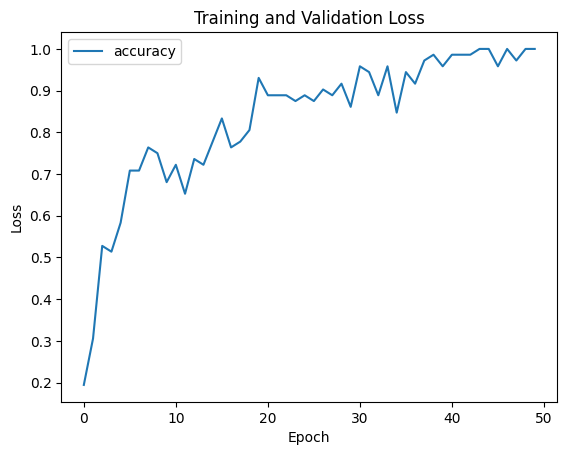

In [65]:
import matplotlib.pyplot as plt
plt.plot(history.history['categorical_accuracy'], label='accuracy')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()